# 7. 프로젝트 : 나랑 닮은 연예인을 찾아보자

**루브릭**
1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.
    * 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.  
2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.
    * 다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.  
3. 다양하고 재미있는 결과 시각화를 시도하였다.
    * matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.

**사용한 함수**
1. `# 얼굴 영역만 추출하는 함수`  
    **`def get_cropped_face(image_file):`**
2. `# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수`  
    **`def get_face_embedding(face):`**
3. `# 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수`    
    **`def get_face_embedding_dict(dir_path):`**`
4. `# 두 임베딩 벡터 간의 거리를 계산하는 함수`  
    **`def get_distance(name1, name2):`**
5. `# 얼굴 영역 자른 모든 이미지 디렉토리에 저장`  
    **`def get_face_cropped_image(dir_path, path_to_save):`**
6. `# 미리 지정한 name1과 호출한 name2의 거리를 비교하는 함수`   
    **`def get_distance_benchmark(name1):`**
7. `# 입력받은 얼굴을 기준으로 가장 닯은 5명의 얼굴 출력하는 함수`  
    **`def get_nearest_face(name, top=5):`**


## Step1. 사진 모으기
비교하려면 사진을 모아야겠죠? 우선 나만 볼 테니 내 사진과 비교해 보고 싶은 연예인 사진을 모아봅시다. 평소에 닮았다고 생각했던 연예인 사진들을 모두 모아보는 것도 좋을 것 같네요.
사진을 하나의 디렉토리 안에 모아 봅시다. 모을 때 사진의 파일명은 가급적 장동건.jpg, 김태희.png와 같이 파일명이 사람 이름이 들어 있도록 하는 것이 좋습니다. (설마 이분들과 닮았다고 생각하시는 것은?? 😅)

**1. 내 사진 찍기**
* 내 사진을 2장 이상 포함합시다.
* 내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 봅시다. 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있습니다.
* 혹시 내 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해 봅시다.

In [1]:
import face_recognition
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Step1-1. 사진 불러오기

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['알프레드 히치콕.jpeg', '이외수.jpeg', '마틴스콜세지.jpg', '송윤아.jpg', '손종석.jpg', 'trump.jpg', '이승환.png', '틸다스윈튼.jpg', '배성재.jpg', 'reagan.jpg', '이건희.jpeg', '차인표.png', '제임스 딘.jpeg', 'biden.jpg', '박미경.jpg', '김수미.jpeg', 'obama.jpg', '이영애.jpg', '박원순.jpg', '강호동.jpeg', '김혜자.jpeg', '히스 레저.jpeg', '남보원.jpg', '이병헌.jpg', '문지윤.jpg', '김준현.png', '강남.png', '성룡.jpg', '노무현.jpg', '푸틴.jpeg', '폴워커.jpeg', '문재인.jpeg', '존 웨인.jpeg', '아담멕케인.jpg', '이정재.jpeg', '조안 크로포드.jpeg', '마이클 잭슨.jpeg', '오인혜.jpg', '복길이.jpeg', '존 레논.jpeg', '크리스락.jpg', 'clinton.jpeg', '강동원.jpg', '토마스에디슨.jpg', '스티브 잡스.jpeg', '대성.jpeg', '유시민.jpeg', '브루노 마스.png', '박성웅.png', '빌게이츠.jpeg', '양희은.jpeg', '마이클조던.jpg', '안성기.png', '브래드피트.jpg', 'bush.jpeg', '조국.jpg', '자니윤.jpg', 'lyb1.jpg', '엄홍길.png', '토드필립스.jpg', '에드가라이트.jpg', 'lyb2.jpg', '이세돌.jpg', '일론머스크.jpg', '레오나르도 디카프리오.jpg', '최불암.jpeg', '넬슨만델라.jpg', '투팍.jpeg', '김흥석.jpg', '휘트니 휴스턴.jpeg', '홍정욱.jpg']


In [3]:
# 이미지 크기 확인
from PIL import Image

for file_name in file_list:
    image_file = os.path.join(dir_path, file_name)
    image = Image.open(image_file)
    print(os.path.splitext(file_name)[:], ":" ,image.size)


('알프레드 히치콕', '.jpeg') : (600, 480)
('이외수', '.jpeg') : (425, 563)
('마틴스콜세지', '.jpg') : (268, 360)
('송윤아', '.jpg') : (533, 761)
('손종석', '.jpg') : (400, 472)
('trump', '.jpg') : (416, 416)
('이승환', '.png') : (709, 570)
('틸다스윈튼', '.jpg') : (800, 534)
('배성재', '.jpg') : (745, 745)
('reagan', '.jpg') : (2399, 3000)
('이건희', '.jpeg') : (590, 590)
('차인표', '.png') : (361, 570)
('제임스 딘', '.jpeg') : (600, 480)
('biden', '.jpg') : (1474, 1898)
('박미경', '.jpg') : (4032, 3024)
('김수미', '.jpeg') : (355, 544)
('obama', '.jpg') : (1280, 720)
('이영애', '.jpg') : (745, 931)
('박원순', '.jpg') : (400, 358)
('강호동', '.jpeg') : (314, 453)
('김혜자', '.jpeg') : (425, 563)
('히스 레저', '.jpeg') : (600, 480)
('남보원', '.jpg') : (400, 258)
('이병헌', '.jpg') : (745, 887)
('문지윤', '.jpg') : (400, 437)
('김준현', '.png') : (574, 440)
('강남', '.png') : (900, 1021)
('성룡', '.jpg') : (387, 500)
('노무현', '.jpg') : (342, 512)
('푸틴', '.jpeg') : (300, 168)
('폴워커', '.jpeg') : (600, 480)
('문재인', '.jpeg') : (275, 183)
('존 웨인', '.jpeg') : (600, 480)
('

* 내가 찍은 사진의 크기는 **(2944, 2208)** 으로 세로로 찍었지만 가로로 긴 사진으로 인식되어 얼굴 영역만 잘라내는 곳에서 **`IndexError: list index out of range`** 에러 메세지가 나왔다.
* **bush**의 사진 크기는 **(2267, 3000)** 으로 내 사진의 크기보다 크지만 정상적으로 얼굴 영역만 잘라내었다.
* 내가 찍은 사진으로 얼굴 영역을 검출할 수 없없던 이유는 사진이 90도 회전되어 있는 것으로 인식하기 때문이라 생각된다.
* PIL 라이브러리에서 size 속성은 (width, height) 내보낸다.  

In [4]:
# # 내 사진 90도 회전
# from PIL import Image

# # 이미지 파일 경로
# file_path1 = os.getenv('HOME')+'/aiffel/face_embedding/images/lyb1.jpg' 
# file_path2 = os.getenv('HOME')+'/aiffel/face_embedding/images/lyb2.jpg'

# # 이미지 파일 읽기
# image1 = Image.open(file_path1)
# image2 = Image.open(file_path2)

# # 이미지 90도 회전
# image1 = image1.rotate(90, resample=0, expand=0)  
# image2 = image2.rotate(90, resample=0, expand=0)

# # 이미지 저장
# image1.save(file_path1)
# image2.save(file_path2)

### Step1-2. 얼굴 영역만 추출

In [5]:
# 얼굴 영역만 추출하는 함수
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)   # 이미지에서 얼굴 영역의 좌표
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]    # [W,  H,  C]

    return cropped_face    # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

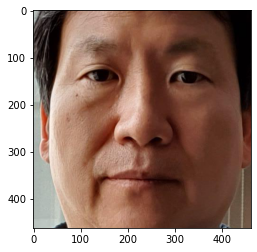

In [6]:
# 추출된 얼굴 영역 출력하기
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/lyb2.jpg'

cropped_face = get_cropped_face(image_path)

plt.imshow(cropped_face)

### Step1-3. 얼굴 임베딩 벡터 구하기

In [7]:
# 이미지 파일이 있는 디렉토리
image_file = os.path.join(dir_path, 'lyb2.jpg')

# 얼굴 영역을 구하는 함수
face = get_cropped_face(image_file)   

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

# 얼굴 임베딩
embedding = get_face_embedding(face)  
print("얼굴 임베딩 벡터의 차원수 : ", len(embedding[0]))

얼굴 임베딩 벡터의 차원수 :  128


In [8]:
# 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        image_file = os.path.join(dir_path, file)
        
        # 얼굴 영역 추출
        try:
            face = get_cropped_face(image_file)
        except:
            print('얼굴 영역 추출 실패 :',file)
            
        # 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하기    
        embedding = get_face_embedding(face)
        
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        if len(embedding) > 0:
          # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 저장됨
          embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [9]:
# get_face_embedding_dict() 함수가 잘 만들어졌는지 확인
embedding_dict = get_face_embedding_dict(dir_path)

# 이미지의 임베딩 딕셔너리에서 key='lyb2'에 대한 value 값 출력
embedding_dict['lyb2']

얼굴 영역 추출 실패 : 마틴스콜세지.jpg
얼굴 영역 추출 실패 : 마이클 잭슨.jpeg


array([-0.07472955,  0.14495206,  0.07197338,  0.00565098, -0.10789295,
       -0.0577328 ,  0.00719547, -0.18901891,  0.09786301, -0.11230215,
        0.26764837, -0.05756923, -0.20892808, -0.12611972, -0.03221866,
        0.21376054, -0.15356231, -0.14328711, -0.11590706,  0.00202465,
        0.06259555,  0.01535422,  0.03200838, -0.04187198,  0.01837113,
       -0.31502143, -0.08327436, -0.07905678,  0.06824401, -0.03780383,
       -0.02315703,  0.01241226, -0.18303889, -0.09948052,  0.0566706 ,
        0.05245492, -0.07641296, -0.07510468,  0.16702604, -0.03858257,
       -0.19303875,  0.04463171,  0.0575667 ,  0.22183055,  0.20799927,
        0.03404779,  0.04442105, -0.20926312,  0.13815248, -0.16250329,
       -0.00448587,  0.12437095,  0.10937277,  0.06065794,  0.04190353,
       -0.09758815,  0.06953602,  0.08028696, -0.142369  , -0.01286593,
        0.17823984, -0.06552548, -0.08843804, -0.08743275,  0.24019201,
        0.012579  , -0.11796369, -0.17264892,  0.10873839, -0.14

### Step1-4. 내 사진들끼리의 얼굴 임베딩 벡터 거리 구하기

In [10]:
# 두 임베딩 벡터 간의 거리를 계산하는 함수
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('lyb1', 'lyb2')

0.2896676012354616

* 내 사진들끼리의 거리가 약 0.29 정도로 가깝게 나왔다.    
* 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있습니다.

## Step2. 얼굴 영역 자르기
임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 합니다. 위 Step1.에서 찾은 이미지들을 이전에 만들었던 get_cropped_face(image_file)을 통해서 잘라줍시다! 자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는 데 도움이 될 것입니다.
```Python
#    힌트
#    from PIL import Image
#    face = get_cropped_face(image_path)
#    pillow_image = Image.fromarray(face)
#    pillow_image.save(path_to_save)
```

In [11]:
from PIL import Image

# 얼굴 영역 자른 모든 이미지 디렉토리에 저장
def get_face_cropped_image(dir_path, path_to_save):
    file_list = os.listdir(dir_path)
    cnt = 0
    
    for file in file_list:
        # 이미지 파일 경로
        image_file = os.path.join(dir_path, file)
        
        # 얼굴 영역 추출
        try:
            face = get_cropped_face(image_file)
            cnt += 1
        except:
            print('얼굴 영역 추출 실패 :',file)
            
        # 넘파이 배열을 이미지로 변환
        pillow_image = Image.fromarray(face)
        
        # 이미지 저장
        file_path = os.path.join(path_to_save, file) 
        pillow_image.save(file_path)
        
    print('얼굴 영역 추출한 이미지 개수 :', cnt)

    return 

# 저장 경로
save_path = os.getenv('HOME')+'/aiffel/face_embedding/cropped_images'
# save_path = dir_path + '/cropped_images'  # 에러 발생

# 저장 경로에 폴더 없으면 생성
if not os.path.exists(save_path):
  os.mkdir(save_path)

get_face_cropped_image(dir_path, save_path)

얼굴 영역 추출 실패 : 마틴스콜세지.jpg
얼굴 영역 추출 실패 : 마이클 잭슨.jpeg
얼굴 영역 추출한 이미지 개수 : 69


* 모든 이미지에 대해서 얼굴 영역 추출하는 것이 성공하는 것은 아니었다.
* 영역 추출에 실패하는 이미지에 대해서 **`try ~ except`** 구문을 이용하여 에러 문제를 해결하였다.
* 저장 경로는 이미지가 있는 폴더에 내에 생성하면 에러가 발생하는 문제는 다른 위치에 폴더를 만들어 해결하했다.

## Step3. 얼굴 영역의 임베딩 추출하기
이제 얼굴 영역으로 잘린 이미지들이 여럿 생겼을 텐데요. 그 이미지를 **face_recognition** 을 사용해서 이미지를 불러오고 임베딩을 추출해 봅시다. 다른 사람의 임베딩은 구분할 수 있게 따로 저장해 주세요. 이전에 만들었던 다음 함수들을 활용하면 손쉽게 수행 가능합니다.

* **def get_face_embedding(face)** : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
* **def get_face_embedding_dict(dir_path)** : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수


In [12]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [13]:
# 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        image_file = os.path.join(dir_path, file)
        
        # 얼굴 영역 추출
        try:
            face = get_cropped_face(image_file)
        except:
            print('얼굴 영역 추출 실패 :',file)
            
        # 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하기    
        embedding = get_face_embedding(face)
        
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        if len(embedding) > 0:
          # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 저장됨
          embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

## Step4. 모은 연예인들과 비교하기
모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아봅시다!

이전 스텝에서 만들었던 **get_nearest_face(name, top=5)** 함수들을 응용하면 손쉽게 수행 가능합니다.

In [14]:
# 두 임베딩 벡터 간의 거리를 계산하는 함수
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [15]:
# 미리 지정한 name1과 호출한 name2의 거리를 비교하는 함수 
def get_distance_benchmark(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [20]:
# 입력받은 얼굴을 기준으로 가장 닯은 5명의 얼굴 출력하는 함수
def get_nearest_face(name, top=5):
    distance_benchmark = get_distance_benchmark(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x: distance_benchmark(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외 
            continue
        if sorted_faces[i]:
            print(f'순위 {i} : 이름({sorted_faces[i][0]}), 거리({distance_benchmark(sorted_faces[i][0])})')

In [35]:
# 나(lyb2)와 가장 닮은 사람은 누굴까?
resemblance_face = get_nearest_face('lyb2')

순위 1 : 이름(lyb1), 거리(0.2896676012354616)
순위 2 : 이름(노무현), 거리(0.42639428963007087)
순위 3 : 이름(김준현), 거리(0.43360131423443954)
순위 4 : 이름(이세돌), 거리(0.4358434941556192)
순위 5 : 이름(문재인), 거리(0.4420336916764428)


### Step4-1. 닮은 사람얼굴 데이터프레임 만들기

In [55]:
import pandas as pd

# 입력받은 얼굴을 기준으로 가장 닯은 5명의 얼굴 출력하는 함수
def get_nearest_face(name, top=5):
    distance_benchmark = get_distance_benchmark(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x: distance_benchmark(x[0]))

    # 빈 DataFrame 생성하기
    df = pd.DataFrame(columns=['순위', '이름', '거리'])

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외 
            continue
        if sorted_faces[i]:
            # DataFrame에 특정 정보를 이용하여 data 채우기
            df = df.append(pd.DataFrame([[i, sorted_faces[i][0], distance_benchmark(sorted_faces[i][0])]], columns=['순위', '이름', '거리']), ignore_index=True)
    
    return df

In [56]:
# 나(lyb2)와 가장 닮은 사람은 누굴까?
similar_face = get_nearest_face('lyb2')
similar_face

,순위,이름,거리
0,1,lyb1,0.289668
1,2,노무현,0.426394
2,3,김준현,0.433601
3,4,이세돌,0.435843
4,5,문재인,0.442034


In [69]:
sf = similar_face[["이름", "거리"]].iloc[1]
sf[0], sf[1]

('노무현', 0.42639428963007087)

**2. 비교할 연예인 사진 모으기**
* 많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아질 것입니다.
* 주위의 동료들과 모은 사진을 주고받는 것도 하나의 방법입니다.

## Step5. 다양한 재미있는 시각화 시도해 보기
* 비단 닮은 꼴 연예인을 찾기만 할 것이 아니라, 그들의 얼굴 사진을 활용하여 재미있는 시각화를 시도해 보시기 바랍니다.  
* tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현해 보는 것도 재미있을 것입니다.

## 회고
1. 핸드폰으로 찍은 원본 이미지의 방향이 얼굴 영역을 검출하는 코드에서 `IndexError: list index out of range` 에러 메세지가 나왔다. 이미지의 방향을 돌린 후에 다시 코드를 수행하여 에러 문제 해결할 수 있었다.
2. 핸드폰으로 찍은 이미지의 폭과 높이에 대한 정보가 아직도 이해를 할 수 없다. 왜 세로로 찍은 사진인데 폭의 치수가 높이의 치수보다 더 크게 나타나는지 알 수 없다.
3. 내가 좋아하는 사람과 가장 많이 닮은 것으로 나와서 기분은 좋다.